In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
fish = pd.read_csv('fish.csv', low_memory=False)

In [169]:
fish.head()

,species,state,HUCName,Common_Name,Dataset,Station_Date,SITE_ID,YEAR,month,ECOREGL3,...,num,mg,na,k,hco3,tn,al,Se,Cadmium,Calcium
0,Ambloplites rupestris,OH,NaN,Rock Bass,OH,200282_38909,200282,2006,8,70,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Campostoma anomalum,OH,NaN,Central Stoneroller,OH,200282_38909,200282,2006,8,70,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Catostomus commersonii,OH,NaN,White Sucker,OH,200282_38909,200282,2006,8,70,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Chrosomus erythrogaster,OH,NaN,South. Redbelly Dace,OH,200282_38909,200282,2006,8,70,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Clinostomus funduloides,OH,NaN,Rosyside Dace,OH,200282_38909,200282,2006,8,70,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42336 entries, 0 to 42335
Data columns (total 67 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            42336 non-null  object 
 1   state              42336 non-null  object 
 2   HUCName            41877 non-null  object 
 3   Common_Name        32579 non-null  object 
 4   Dataset            42336 non-null  object 
 5   Station_Date       42336 non-null  object 
 6   SITE_ID            42336 non-null  object 
 7   YEAR               42336 non-null  int64  
 8   month              42336 non-null  int64  
 9   ECOREGL3           42336 non-null  int64  
 10  LAT_DD             42219 non-null  float64
 11  LON_DD             42219 non-null  float64
 12  HUC                42336 non-null  int64  
 13  BigHUC             42336 non-null  int64  
 14  FE                 4900 non-null   float64
 15  MN                 4876 non-null   float64
 16  PHSTVL             415

In [171]:
fish['species'].value_counts()

Semotilus atromaculatus    2286
Catostomus commersonii     2279
Salmo trutta               2096
Rhinichthys atratulus      2069
Salvelinus fontinalis      1743
                           ... 
Macrhybopsis aestivalis       1
Cottus kanawhae               1
Ammocrypta clara              1
Etheostoma cinereum           1
Cottus baileyi                1
Name: species, Length: 212, dtype: int64

In [172]:
sa = fish[fish['species']=='Semotilus atromaculatus']
sa = sa[sa['ABUND'].notna()]

In [173]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1164 entries, 16 to 42320
Data columns (total 67 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            1164 non-null   object 
 1   state              1164 non-null   object 
 2   HUCName            1140 non-null   object 
 3   Common_Name        587 non-null    object 
 4   Dataset            1164 non-null   object 
 5   Station_Date       1164 non-null   object 
 6   SITE_ID            1164 non-null   object 
 7   YEAR               1164 non-null   int64  
 8   month              1164 non-null   int64  
 9   ECOREGL3           1164 non-null   int64  
 10  LAT_DD             1158 non-null   float64
 11  LON_DD             1158 non-null   float64
 12  HUC                1164 non-null   int64  
 13  BigHUC             1164 non-null   int64  
 14  FE                 299 non-null    float64
 15  MN                 299 non-null    float64
 16  PHSTVL             116

In [174]:
sa = sa.iloc[:,np.r_[10:12,16,17,19:26,28,37,38,58:62]]

In [176]:
sa = sa.fillna(sa.mean())

In [178]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1164 entries, 16 to 42320
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LAT_DD   1164 non-null   float64
 1   LON_DD   1164 non-null   float64
 2   PHSTVL   1164 non-null   float64
 3   COND     1164 non-null   float64
 4   CA       1164 non-null   float64
 5   SO4      1164 non-null   float64
 6   NO3      1164 non-null   float64
 7   CL       1164 non-null   float64
 8   alk      1164 non-null   float64
 9   do       1164 non-null   float64
 10  Temp     1164 non-null   float64
 11  ABUND    1164 non-null   float64
 12  WS_AREA  1164 non-null   float64
 13  LWSKM2   1164 non-null   float64
 14  mg       1164 non-null   float64
 15  na       1164 non-null   float64
 16  k        1164 non-null   float64
 17  hco3     1164 non-null   float64
dtypes: float64(18)
memory usage: 172.8 KB


In [194]:
sa.describe()

,LAT_DD,LON_DD,PHSTVL,COND,CA,SO4,NO3,CL,alk,do,Temp,ABUND,WS_AREA,LWSKM2,mg,na,k,hco3
count,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000
mean,39.094340,-81.620796,7.700470,509.121082,2916.439117,3332.170258,2265.374495,560.134331,2102.988981,8.050340,19.532122,67.882302,98.974288,1.446495,1902.940369,1160.695359,87.877309,2039.336414
std,1.130817,1.587218,0.476166,493.491428,2440.120552,5117.561320,32112.006262,739.682949,1193.419421,1.403634,3.215433,86.653176,552.898921,0.608706,2087.917142,2033.103501,47.370316,1228.489649
min,36.595030,-84.880540,6.170000,17.800000,47.842111,53.082206,6.000000,0.725622,6.278784,1.150000,5.530000,1.000000,0.218100,-0.661344,47.685544,4.349761,8.696028,0.000000
25%,38.145987,-82.853493,7.431500,207.468750,1332.741486,572.594753,135.000000,194.280969,1275.483952,8.050340,19.532122,9.750000,11.000000,1.041393,822.873920,376.830651,68.033631,1154.858502
50%,39.148208,-81.846499,7.780000,355.875000,2761.413140,1715.500864,350.785033,452.004332,2102.988981,8.050340,19.532122,35.000000,25.000000,1.397940,1728.035232,937.373449,87.877309,2039.336414
75%,40.060236,-80.852525,8.048125,604.858333,3199.253902,3332.170258,1281.262687,560.134331,2753.690521,8.050340,20.000000,92.000000,70.000000,1.845098,1902.940369,1160.695359,90.221291,2747.184310
max,41.327583,-74.983466,9.500000,3590.000000,18277.883760,52867.298780,875120.000000,8612.292636,7673.285875,19.700000,29.700000,637.000000,15991.000000,4.203876,21641.584100,27925.464240,997.485569,7675.454050


qNO3_low = sa['NO3'].quantile(0.01)
qNO3_high  = sa['NO3'].quantile(0.99)

qWS_AREA_low = sa['WS_AREA'].quantile(0.01)
qWS_AREA_high = sa['WS_AREA'].quantile(0.99)

sa = sa[(sa['NO3'] < qNO3_high) & (sa['NO3'] > qNO3_low)]
sa = sa[(sa['WS_AREA'] < qWS_AREA_high) & (sa['WS_AREA'] > qWS_AREA_low)]

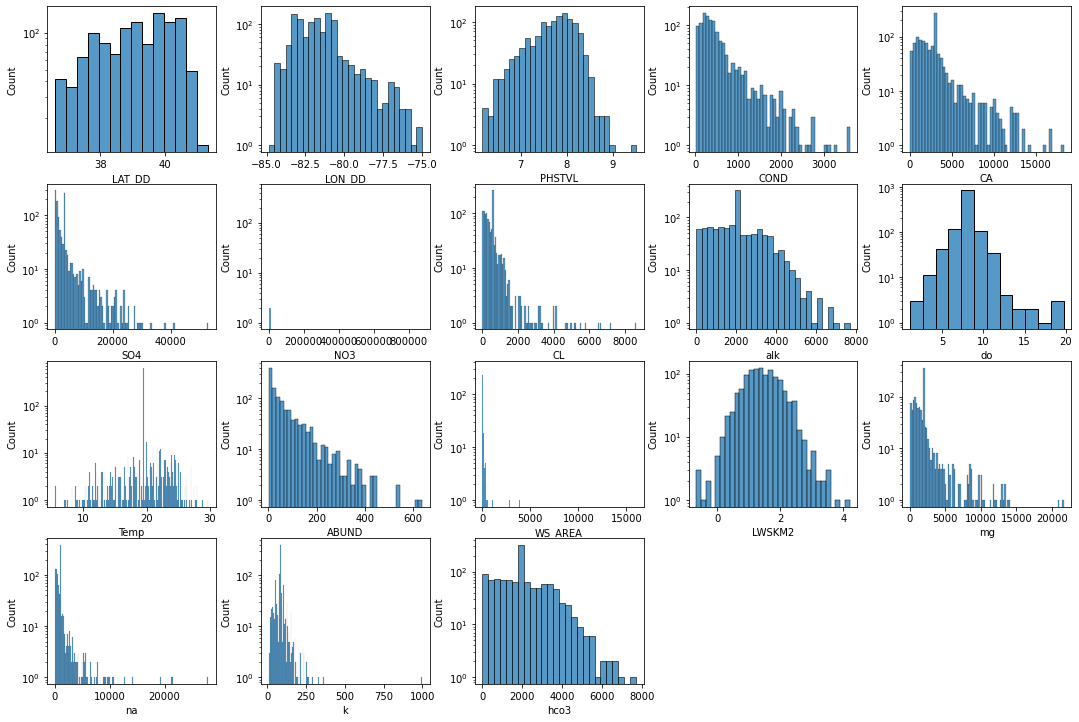

In [179]:
try:
    fig,ax=plt.subplots(4,5,figsize=(15,10))
    fig.tight_layout()
    fig.delaxes(ax[3,3]) # delete empty graph 19
    fig.delaxes(ax[3,4]) # delete empty graph 20
    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]):
            g = sns.histplot(sa[sa.columns[i*5+j]], ax=ax[i][j])
            g.axes.set_yscale('log')
except IndexError:
    pass

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


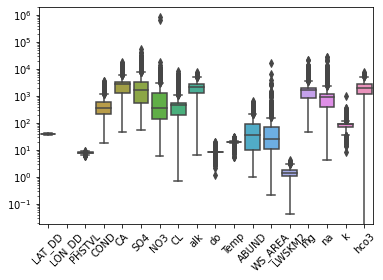

In [180]:
fig, ax = plt.subplots()
ax = sns.boxplot(data=sa)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_yscale('log')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 [Text(0, 0.5, 'LAT_DD'),
  Text(0, 1.5, 'LON_DD'),
  Text(0, 2.5, 'PHSTVL'),
  Text(0, 3.5, 'COND'),
  Text(0, 4.5, 'CA'),
  Text(0, 5.5, 'SO4'),
  Text(0, 6.5, 'NO3'),
  Text(0, 7.5, 'CL'),
  Text(0, 8.5, 'alk'),
  Text(0, 9.5, 'do'),
  Text(0, 10.5, 'Temp'),
  Text(0, 11.5, 'ABUND'),
  Text(0, 12.5, 'WS_AREA'),
  Text(0, 13.5, 'LWSKM2'),
  Text(0, 14.5, 'mg'),
  Text(0, 15.5, 'na'),
  Text(0, 16.5, 'k'),
  Text(0, 17.5, 'hco3')])

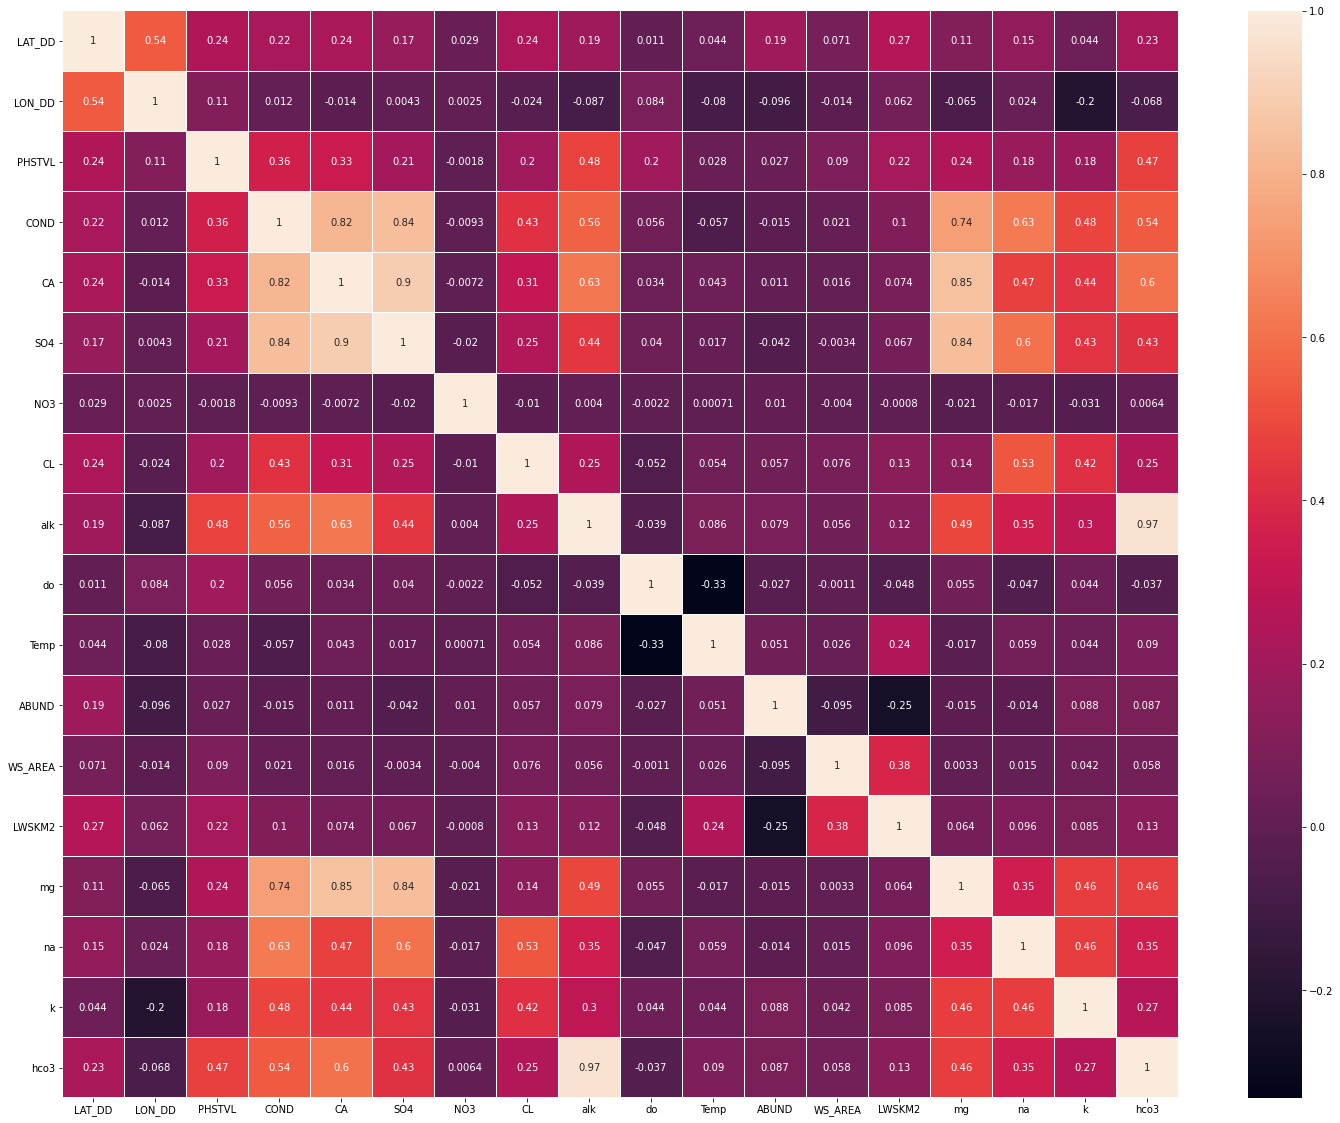

In [181]:
fig,ax=plt.subplots(figsize=(25,20))
sns.heatmap(sa.corr(),linewidths=.1, annot=True)
plt.yticks(rotation=0)

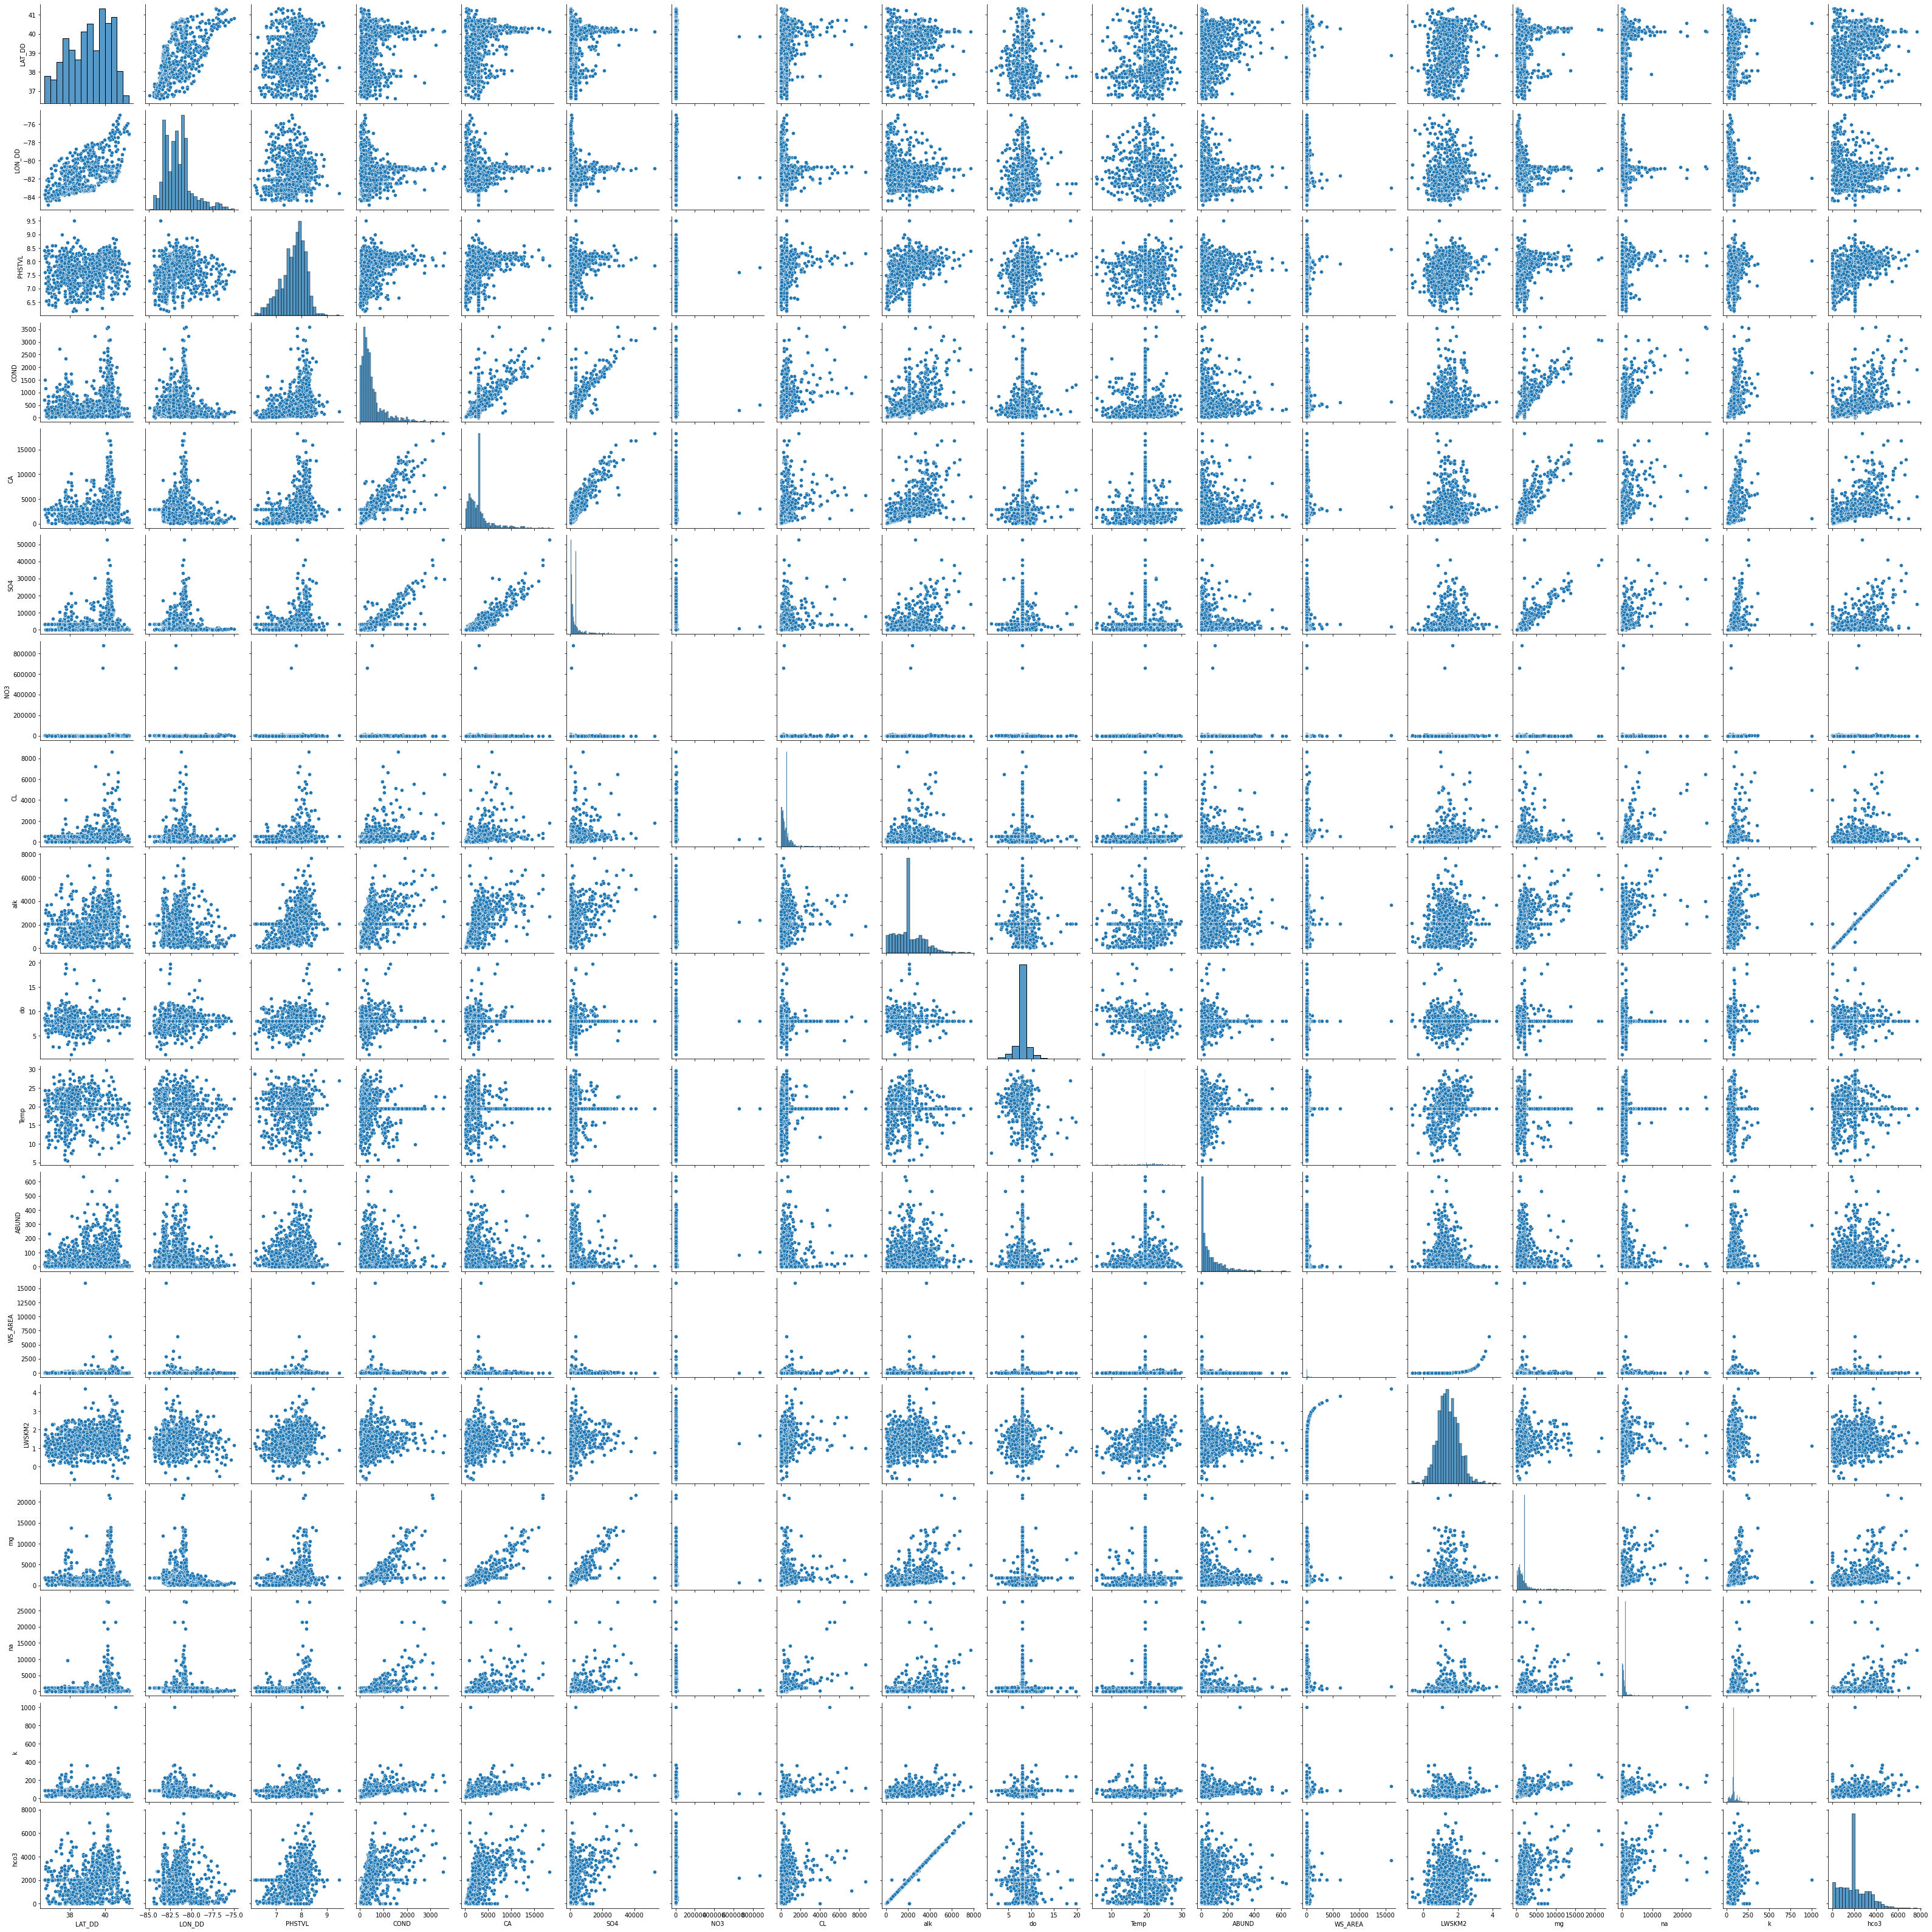

In [182]:
sns.pairplot(sa)

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [184]:
X=sa.drop('ABUND',axis=1)
y=sa['ABUND']

In [185]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=0)

In [186]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [187]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

In [188]:
from sklearn.metrics import mean_squared_error, r2_score
print('MSE ', mean_squared_error(y_test,y_pred))
print('R2 ', r2_score(y_test,y_pred))

MSE  5313.437795901814
R2  0.21218364050266658


In [189]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

In [190]:
print('MSE ', mean_squared_error(y_test,y_pred))
print('R2 ', r2_score(y_test,y_pred))

MSE  4670.184671254772
R2  0.3075579262966167
